In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from utils import Data, Say
from load import Load
import pandas as pd

import resume 

say = Say()
load = Load(path="in")
data = Data(path="in")
try:
    labels = data.get_labels(path="in")
    data_dict = load.load_datasets_from_csv(path="in")
except ValueError:
    say.cow_says_error('Error al cargar base de datos')

data_dict = resume.dataset_date_iter(data_dict, labels)


 _________________________________________________________ 
< CanalDeVenta do not have [Fecha, Fecha_Entrega] columns > 
 --------------------------------------------------------- 
        \   ^__^ 
         \  (oo)\_______ 
            (__)\  error )\/\ 
                ||----w | 
                ||     || 
 _____________________________________________________ 
< Clientes do not have [Fecha, Fecha_Entrega] columns > 
 ----------------------------------------------------- 
        \   ^__^ 
         \  (oo)\_______ 
            (__)\  error )\/\ 
                ||----w | 
                ||     || 
 ______________________________________ 
< Se cambio la columna Fecha en Compra > 
 -------------------------------------- 
        \   ^__^ 
         \  (oo)\_______ 
            (__)\  good )\/\ 
                ||----w | 
                ||     || 
 _____________________________________ 
< Se cambio la columna Fecha en Gasto > 
 ------------------------------------- 
        \   ^__^ 
 

In [13]:
df_ventas = pd.read_csv('in/Venta.csv')
from scipy import stats

In [27]:
def null_review(df):
    null_serie = df.isnull().sum()
    null_serie = null_serie[null_serie != 0]
    return null_serie


def null_percentage(df):
    null_serie = null_review(df)
    total = df.shape[0]
    null_dict = {}
    for i in range(null_serie.size):
        percent = round(null_serie.values[i] * 100 / total, 2)
        null_dict[null_serie.index[i]] = percent
    return null_dict

def null_all_percentage(df):
    null_serie = null_review(df)
    null_sum = null_serie.sum()
    total = df.shape[0]
    null_sum_percent = null_sum/total
    return null_sum_percent


def outlier_detect(df):
    ban_list = ["Telefono", "X", "Y", "Latitud", "Longitud"]
    z_dict = {}
    outlier_dict = {}
    for col in df.columns:
        if df[col].dtypes == np.float64:
            if col in ban_list:
                continue
            else:
                z = np.abs(stats.zscore(df[col].dropna()))
                z_dict[col] = z

                outlier_dict[col] = z_dict[col][z_dict[col] > 3]
    return outlier_dict


def outlier_percent(df):
    percent_outlier_dict = {}
    outlier_dict = outlier_detect(df)
    total = df.shape[0]

    for i in range(len(outlier_dict.keys())):
        percent = len(list(outlier_dict.values())[i]) * 100 / total
        percent_outlier_dict[list(outlier_dict.keys())[i]] = percent

    return percent_outlier_dict

In [32]:
outlier_dict = outlier_detect(df_ventas)
total = df_ventas.shape[0]
percent = 0
for i in range(len(outlier_dict.keys())):
    percent += len(list(outlier_dict.values())[i]) * 100 / total
percent



1.5331312256388048

NameError: name 'dt' is not defined

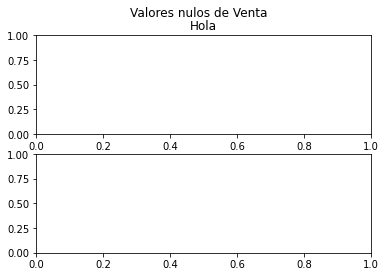

In [4]:
null, axs = plt.subplots(2,1)
null.suptitle(f'Valores nulos de {labels[-1]}')
axs[0].set_title('Hola')
sns.barplot(ax=axs[0],x=dt.index,y=dt.values)
plt.tight_layout()
plt.show()

In [6]:
df_localidades = pd.read_csv('in/Localidades.csv')


FileNotFoundError: [Errno 2] No such file or directory: 'in/Localidades.csv'

In [ ]:
df_localidades.departamento_nombre.unique()
df_localidades.municipio_nombre.unique()
df_localidades.localidad_censal_nombre.unique()
df_localidades.provincia_nombre.unique()


array(['Buenos Aires', 'Catamarca', 'Córdoba', 'Corrientes', 'Chaco',
       'Chubut', 'Entre Ríos', 'Formosa', 'Jujuy', 'La Pampa', 'La Rioja',
       'Mendoza', 'Misiones', 'Neuquén', 'Río Negro', 'Salta', 'San Juan',
       'San Luis', 'Santa Cruz', 'Santa Fe', 'Santiago del Estero',
       'Tucumán', 'Tierra del Fuego, Antártida e Islas del Atlántico Sur'],
      dtype=object)

In [ ]:
df_sucursales = pd.read_csv('in/Sucursales.csv', sep=';')
buenos_aires = ['Ciudad de Buenos Aires', 'CABA', 'C deBuenos Aires', 'Bs As', 'Bs.As. ', 'Buenos Aires', 'B. Aires', 'B.Aires', 'Provincia de Buenos Aires', 'Prov de Bs As.', 'Pcia Bs AS']


In [ ]:
df_sucursales[['Latitud','Longitud']] = pd.to_numeric(df_sucursales[['Latitud','Longitud']], errors = "coerce")
df_sucursales[['Latitud','Longitud']] = df_sucursales[['Latitud','Longitud']].replace(np.nan, 0, regex=True)

df_sucursales[['Latitud','Longitud']].dtypes


In [ ]:
cord_label = ['Latitud','Longitud']



'Latitud'

In [ ]:
df_sucursales.Latitud.head()

0    -34,5678060
1    -34,5790350
2    -34,5959660
3    -34,6046850
4    -34,6173080
Name: Latitud, dtype: object

In [ ]:
df_sucursales = pd.read_csv('in/Sucursales.csv', sep=';')

In [ ]:
cord_label = ['Latitud','Longitud']
for label in cord_label:
    df_sucursales[label] = df_sucursales[label].replace(',','.',regex=True)   
    df_sucursales[label] = df_sucursales[label].astype(float)
    df_sucursales[label] = df_sucursales[label].apply(lambda x : -x if x > 0 else x )

df_sucursales.Longitud.head()


0   -58.449572
1   -58.433566
2   -58.405150
3   -58.398764
4   -58.416179
Name: Longitud, dtype: float64

In [ ]:
df_clientes = pd.read_csv('in/Clientes.csv', sep=';')


In [ ]:
cord_label = ['X','Y']
for label in cord_label:
    df_clientes[label] = df_clientes[label].replace(',','.',regex=True)   
    df_clientes[label] = df_clientes[label].replace('',np.nan,regex=True)
    df_clientes[label] = pd.to_numeric(df_clientes[label], errors='coerce')
    df_clientes[label] = df_clientes[label].apply(lambda x : -x if x > 0 else x )



0   -58.818503
1   -58.730738
2   -59.127941
3   -58.143940
4   -58.893810
Name: X, dtype: float64

In [ ]:
df_clientes = pd.read_csv('in/Clientes.csv', sep=';')


In [ ]:
df_clientes['Telefono'] = df_clientes['Telefono'].replace('-','', regex= True)
df_clientes['Telefono'] = df_clientes['Telefono'].replace('/','', regex= True)
df_clientes['Telefono'] = df_clientes['Telefono'].replace(' ','', regex= True)
df_clientes['Telefono'] = pd.to_numeric(df_clientes['Telefono'], errors='coerce',downcast='integer')


In [ ]:
df_clientes['Edad'] = pd.to_numeric(df_clientes['Edad'])
df_clientes['Edad'].head()

0    58.0
1    61.0
2    15.0
3    29.0
4    34.0
Name: Edad, dtype: float64

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import numpy as np


def null_review(df):
    null_serie = df.isnull().sum()
    null_serie = null_serie[null_serie != 0]
    return null_serie


def null_percentage(df):
    null_serie = null_review(df)
    total = df.shape[0]
    null_dict = {}
    for i in range(null_serie.size):
        percent = round(null_serie.values[i] * 100 / total, 2)
        null_dict[null_serie.index[i]] = percent
    return null_dict


def null_all_percentage(df):
    null_serie = null_review(df)
    null_sum = null_serie.sum()
    total = df.shape[0]
    null_sum_percent = null_sum / total
    return float(null_sum_percent)


def outlier_detect(df):
    ban_list = ["Telefono", "X", "Y", "Latitud", "Longitud"]
    z_dict = {}
    outlier_dict = {}
    for col in df.columns:
        if df[col].dtypes == np.float64:
            if col in ban_list:
                continue
            else:
                z = np.abs(stats.zscore(df[col].dropna()))
                z_dict[col] = z

                outlier_dict[col] = z_dict[col][z_dict[col] > 3]
    return outlier_dict


def outlier_percent(df):
    percent_outlier_dict = {}
    outlier_dict = outlier_detect(df)
    total = df.shape[0]

    for i in range(len(outlier_dict.keys())):
        percent = len(list(outlier_dict.values())[i]) * 100 / total
        percent_outlier_dict[list(outlier_dict.keys())[i]] = percent

    return percent_outlier_dict


def outlier_all_percent(df):
    outlier_dict = outlier_detect(df)
    total = df.shape[0]
    percent = 0
    for i in range(len(outlier_dict.keys())):
        percent += len(list(outlier_dict.values())[i]) * 100 / total
    return percent


def visual_report(df):
    
    nulls = null_all_percentage(df)
    outliers = outlier_all_percent(df)
    sin_error = 100 - nulls - outliers
    height = np.array([nulls, sin_error, outliers])
    visual=['no_error', 'outlier','null']
    plt.bar(visual, height, align="center")
    plt.bar_label(null, sin_error)
    return plt.show()

In [132]:

def visual_report(df,label):
    nulls = null_all_percentage(df)
    outliers = outlier_all_percent(df)

    sin_error = 100 - nulls - outliers

    height = np.array([nulls, sin_error, outliers])
    visual=['no_error', 'outlier','null']

    fig, ax = plt.subplots()
    bar = ax.bar(visual,height, align='center',color=[ '#19C5AF', '#FDF400', '#E455AD'])
    
    ax.set_title(f'Tabla {label}')
    ax.set_ylabel('Porcentaje')

    ax.bar_label(bar, label_type='center', padding=8, fontsize=12)
    plt.savefig(f'{label}_data_quality.png')
    plt.show()

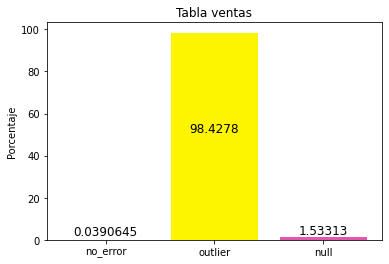

In [133]:
visual_report(df_ventas,'ventas')